## What we do here?
    1. change working directory
    2. call changed ndvi raster data
    3. examine NDVI change distribution histogram
    4. examine positive change, negative and no chenge raster
    5. plot 
    6. examine absolute mean changes 
    7. examine area= (30  x 30 x grid count) m^2
    
    

In [1]:
import os

# Change the working directory
os.chdir('C:/Users/IT/Downloads')
file_path = 'NDVI_Change_Detection.tif'


# Let's plot the raster histogram


In [2]:
# import libraries 
import rasterio
import numpy as np
import matplotlib.pyplot as plt

Pixel Size (width x height): 30.0 x 30.0 meters


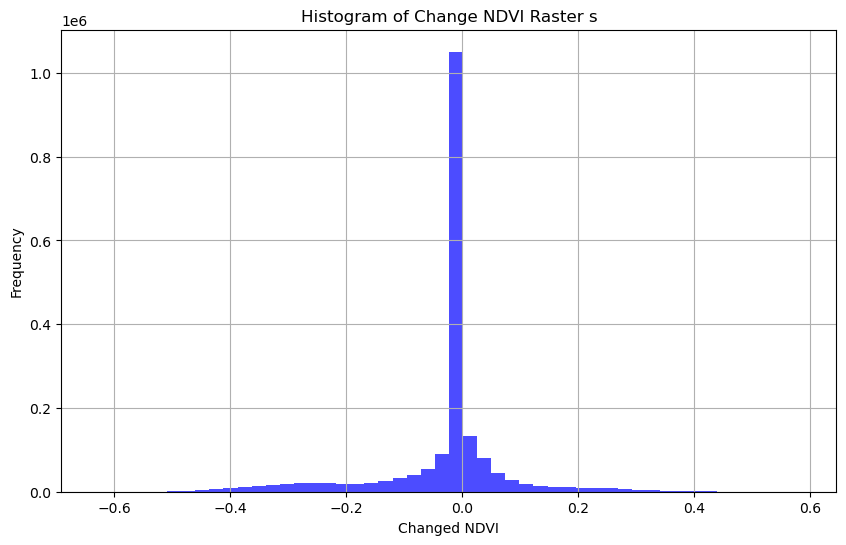

In [3]:
with rasterio.open(file_path) as src:
    # Read the raster data
    raster_data = src.read(1, masked=True)  # Assuming it's a single-band raster, and using masked=True to handle NoData
    
    # Flatten the raster data array
    raster_values = raster_data.flatten()
        # Read metadata
    metadata = src.profile
        # Extract pixel size information
    pixel_width = metadata['transform'][0]
    pixel_height = -metadata['transform'][4]  # Negative sign because of raster orientation
    
    # Display grid size information
    print(f"Pixel Size (width x height): {pixel_width} x {pixel_height} meters")
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(raster_values, bins=50, color='blue', alpha=0.7)
    plt.xlabel('Changed NDVI')
    plt.ylabel('Frequency')
    plt.title('Histogram of Change NDVI Raster s')
    plt.grid(True)
    plt.show()


In [4]:
np.shape(raster_data), np.shape(raster_values)

((1510, 1250), (1887500,))

Number of cells with positive values: 400456
Number of cells with negative values: 578883
Number of cells with no-change values: 908161


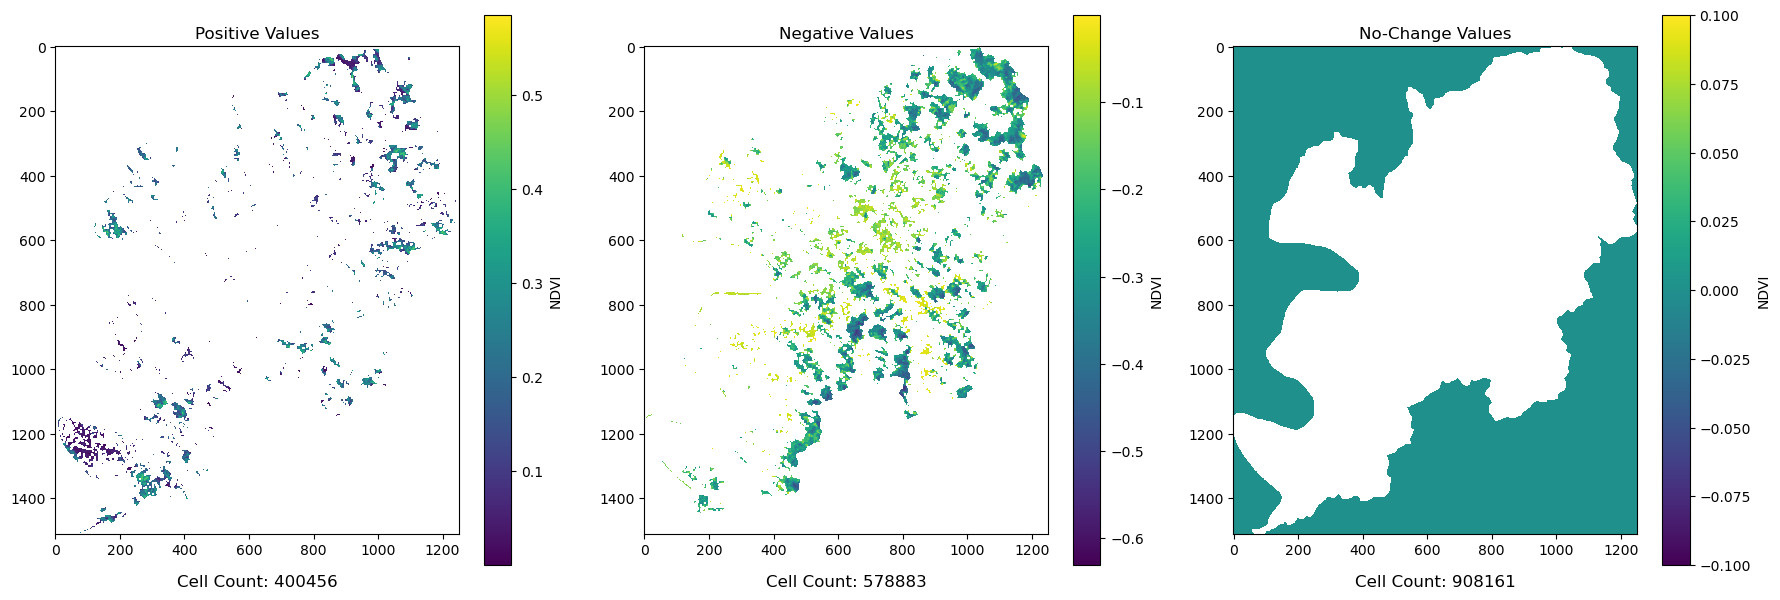

In [5]:
with rasterio.open(file_path) as src:
    # Read the raster data
    raster_data = src.read(1)  # Assuming it's a single-band raster
    
    # Categorize raster data into positive, negative, and no-change
    positive_values = np.where(raster_data > 0, raster_data, np.nan)
    negative_values = np.where(raster_data < 0, raster_data, np.nan)
    no_change_values = np.where(raster_data == 0, raster_data, np.nan)
    
    # Count number of cells in each category
    count_positive = np.sum(~np.isnan(positive_values))
    count_negative = np.sum(~np.isnan(negative_values))
    count_no_change = np.sum(~np.isnan(no_change_values))
    
    print(f"Number of cells with positive values: {count_positive}")
    print(f"Number of cells with negative values: {count_negative}")
    print(f"Number of cells with no-change values: {count_no_change}")
    
    # Plot the categorized raster data
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
    
    # Plot positive values
    im1 = ax1.imshow(positive_values, cmap='viridis')
    ax1.set_title('Positive Values')
    fig.colorbar(im1, ax=ax1, label='NDVI')
    ax1.annotate(f"Cell Count: {count_positive}", xy=(0.5, -0.1), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12)
    
    # Plot negative values
    im2 = ax2.imshow(negative_values, cmap='viridis')
    ax2.set_title('Negative Values')
    fig.colorbar(im2, ax=ax2, label='NDVI')
    ax2.annotate(f"Cell Count: {count_negative}", xy=(0.5, -0.1), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12)
    
    # Plot no-change values
    im3 = ax3.imshow(no_change_values, cmap='viridis')
    ax3.set_title('No-Change Values')
    fig.colorbar(im3, ax=ax3, label='NDVI')
    ax3.annotate(f"Cell Count: {count_no_change}", xy=(0.5, -0.1), xycoords='axes fraction',
                 ha='center', va='center', fontsize=12)
    
    plt.tight_layout()
    plt.show()


Mean of absolute values for positive subset: 0.07699587941169739
Mean of absolute values for negative subset: 0.12657101452350616
Mean of absolute values for no-change subset: 0.0


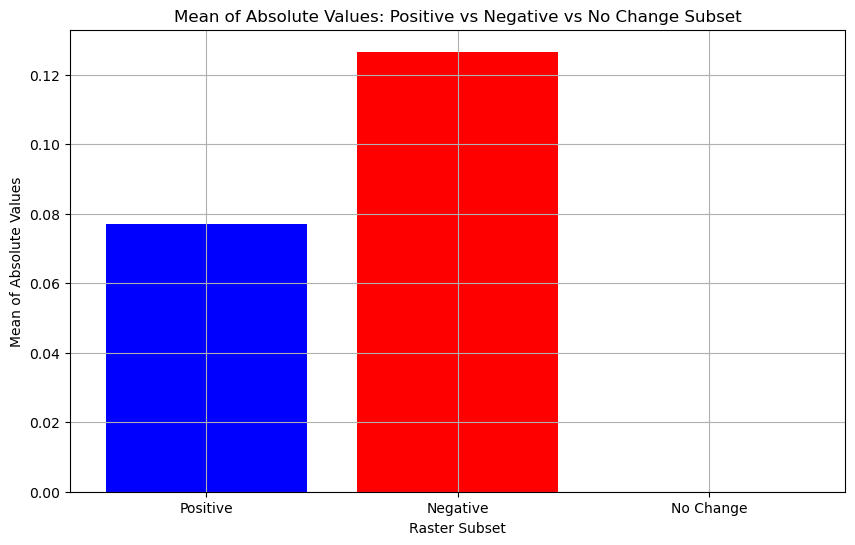

In [6]:
with rasterio.open(file_path) as src:
    # Read the raster data
    raster_data = src.read(1)  # Assuming it's a single-band raster

    # Separate positive, negative, and no-change values
    positive_values = raster_data[raster_data > 0]
    negative_values = raster_data[raster_data < 0]
    no_change_values = raster_data[raster_data == 0]

    # Calculate mean of absolute values
    mean_positive_abs = np.mean(np.abs(positive_values))
    mean_negative_abs = np.mean(np.abs(negative_values))
    mean_no_change_abs = np.mean(np.abs(no_change_values))

    print(f"Mean of absolute values for positive subset: {mean_positive_abs}")
    print(f"Mean of absolute values for negative subset: {mean_negative_abs}")
    print(f"Mean of absolute values for no-change subset: {mean_no_change_abs}")

    # Plotting the means
    plt.figure(figsize=(10, 6))
    plt.bar(['Positive', 'Negative', 'No Change'], [mean_positive_abs, mean_negative_abs, mean_no_change_abs], 
            color=['blue', 'red', 'green'])
    plt.xlabel('Raster Subset')
    plt.ylabel('Mean of Absolute Values')
    plt.title('Mean of Absolute Values: Positive vs Negative vs No Change Subset')
    plt.grid(True)
    plt.show()

Thank you 